#### Titanic - Machine Learning from Disaster
Script to perform exploratory data analysis
<br>@Author James Laurence
<br>@Date September 1st, 2024

In [1]:
# Imports, Filepaths, Variables
import pandas as pd
import numpy as np
import os

RAW_DATA_FP = os.path.join(os.path.pardir, 'data', 'raw')
TRAIN_FP = os.path.join(RAW_DATA_FP, 'train.csv')
TEST_FP = os.path.join(RAW_DATA_FP, 'test.csv')

In [2]:
# Import Titanic datasets
train_df = pd.read_csv(TRAIN_FP, index_col='PassengerId')
test_df = pd.read_csv(TEST_FP, index_col='PassengerId')

#### Data Structure

In [3]:
type(train_df)

pandas.core.frame.DataFrame

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
# concatenate datasets into one
titanic_df = pd.concat([train_df, test_df])

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [8]:
titanic_df.loc[5:10,]  # row 5 to 10, with all columns

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
titanic_df.loc[5:10, 'Pclass': 'Age']  # row id 5 to 10, with column range

,Pclass,Name,Sex,Age
PassengerId,,,,
5,3,"Allen, Mr. William Henry",male,35.0
6,3,"Moran, Mr. James",male,NaN
7,1,"McCarthy, Mr. Timothy J",male,54.0
8,3,"Palsson, Master. Gosta Leonard",male,2.0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


In [10]:
titanic_df.loc[5:10, ['Survived', 'Fare', 'Embarked']]  # row id 5 to 10, with specific columns

,Survived,Fare,Embarked
PassengerId,,,
5,0.0,8.0500,S
6,0.0,8.4583,Q
7,0.0,51.8625,S
8,0.0,21.0750,S
9,1.0,11.1333,S
10,1.0,30.0708,C


#### Filter DataFrame based on conditions

In [11]:
# Male Passengers with .sum()
(titanic_df['Sex'] == 'male').sum()

843

In [12]:
# using length of filtered df
male_passengers = titanic_df.loc[titanic_df['Sex'] == 'male']
print(f"Number of Male Passengers with length of Dataframe: {len(male_passengers)}")

Number of Male Passengers with length of Dataframe: 843


In [13]:
# Male Passengers in first class with .sum()
((titanic_df['Sex'] == 'male') & (titanic_df['Pclass'] == 1)).sum()

179

In [14]:
# male passengers in first class
male_firstclass = titanic_df.loc[((titanic_df['Sex'] == 'male') & (titanic_df['Pclass'] == 1)), :]
print(f"Number of Male Passengers in First Class with length of Dataframe: {len(male_firstclass)}")

Number of Male Passengers in First Class with length of Dataframe: 179


#### Summary Statistics

In [15]:
titanic_df.describe()  # only for numerical values

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### Numerical features

In [16]:
# Centrality Measures
print(f'Mean Fare: ${titanic_df['Fare'].mean():.2f}')
print(f'Median Fare: ${titanic_df['Fare'].median():.2f}')

Mean Fare: $33.30
Median Fare: $14.45


In [17]:
# Dispersion Measures
# dispersion measures
print(f'Min Fare: ${titanic_df.Fare.min():.2f}')  # minimum
print(f'Max Fare: ${titanic_df.Fare.max():.2f}')  # maximum
print(f'Fare Range: ${titanic_df.Fare.max() - titanic_df.Fare.min():.2f}')  # range
print(f'25th Percentile: ${titanic_df.Fare.quantile(.25):.2f}')  # 25 percentile
print(f'50th Percentile (Median): ${titanic_df.Fare.quantile(.5):.2f}')  # 50 percentile
print(f'75th Percentile: ${titanic_df.Fare.quantile(.75):.2f}')  # 75 percentile
print(f'Variance of Fare: ${titanic_df.Fare.var():.2f}')  # variance
print(f'Standard Deviation of Fare: ${titanic_df.Fare.std():.2f}')  # standard deviation

Min Fare: $0.00
Max Fare: $512.33
Fare Range: $512.33
25th Percentile: $7.90
50th Percentile (Median): $14.45
75th Percentile: $31.27
Variance of Fare: $2678.96
Standard Deviation of Fare: $51.76


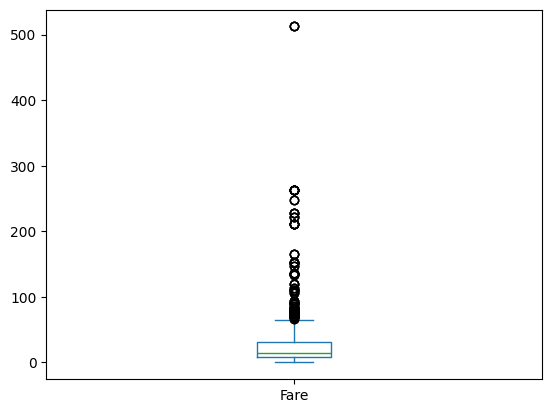

In [18]:
titanic_df['Fare'].plot(kind='box');

In [19]:
titanic_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [20]:
# categorical columns: Counts
titanic_df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [21]:
# categorical columns: Proportions
titanic_df['Sex'].value_counts(normalize=True)

Sex
male      0.644003
female    0.355997
Name: proportion, dtype: float64

In [22]:
# categorical columns: on other columns
titanic_df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

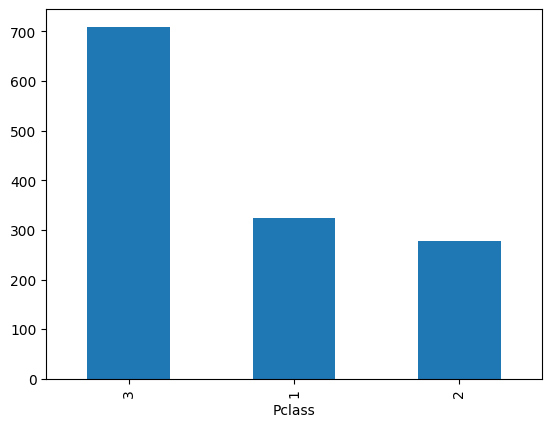

In [23]:
# Visualize categorical columns
titanic_df['Pclass'].value_counts().plot(kind='bar');

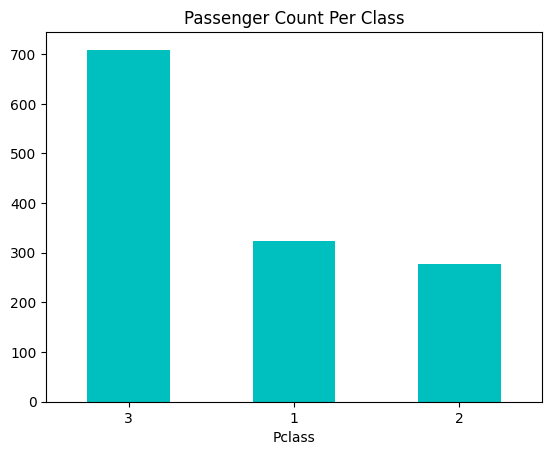

In [24]:
# Visualize categorical columns
titanic_df['Pclass'].value_counts().plot(kind='bar', rot=0, title='Passenger Count Per Class', color='c');

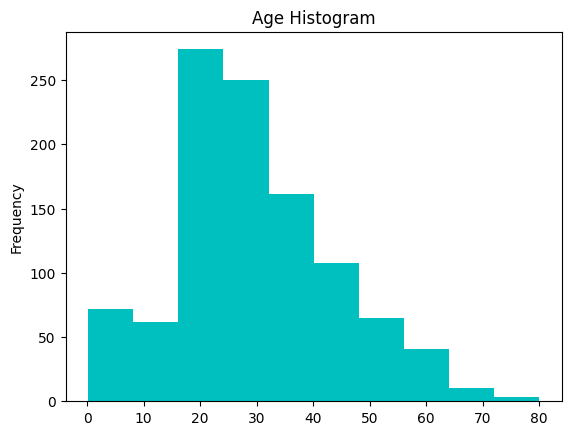

In [25]:
# Distributions
titanic_df['Age'].plot(kind='hist', title='Age Histogram', color='c');

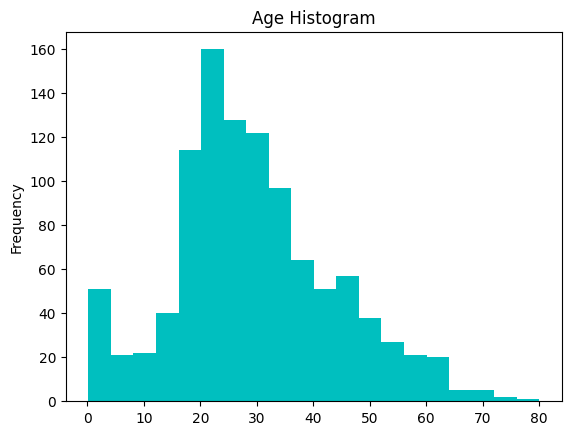

In [26]:
# Distributions: Use bins to add or remove bins
titanic_df['Age'].plot(kind='hist', title='Age Histogram', color='c', bins=20);

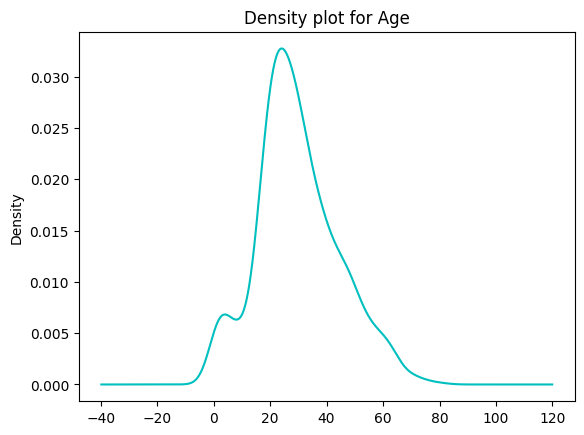

In [27]:
# Use KDE for a Density Plot
titanic_df['Age'].plot(kind='kde', title='Density plot for Age', color='c');

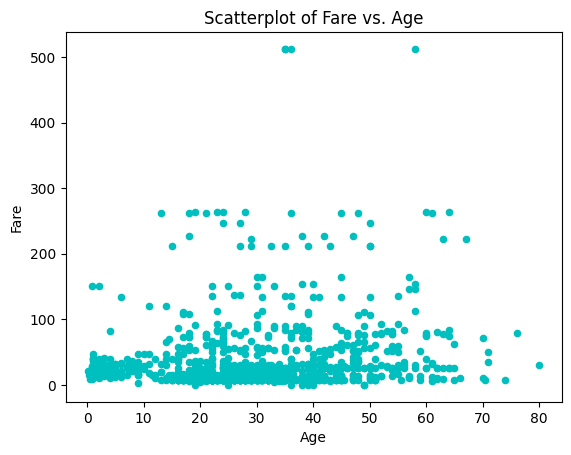

In [28]:
# Use scatterplot
titanic_df.plot.scatter(x='Age', y='Fare', title='Scatterplot of Fare vs. Age', color='c');

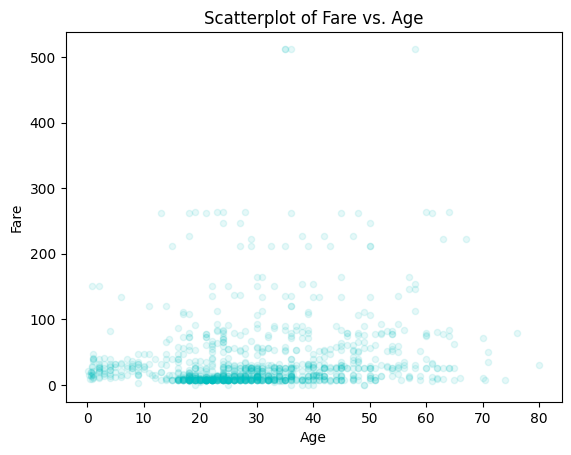

In [29]:
# Use scatterplot: Use Alpha for transparency
titanic_df.plot.scatter(x='Age', y='Fare', title='Scatterplot of Fare vs. Age', color='c', alpha=0.1);

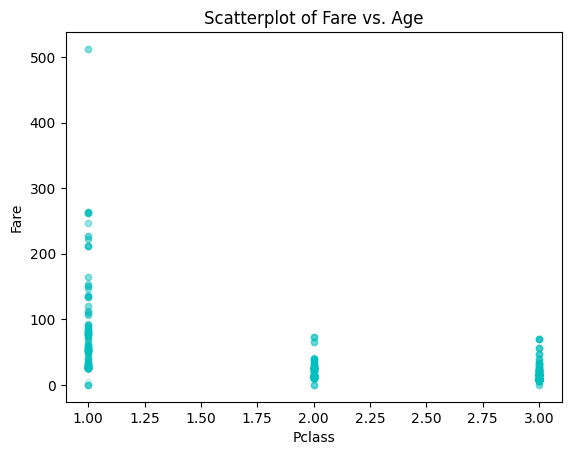

In [30]:
# Use scatterplot: Use Alpha for transparency
titanic_df.plot.scatter(x='Pclass', y='Fare', title='Scatterplot of Fare vs. Age', color='c', alpha=0.15);

#### Grouping and Aggrergations

In [31]:
# groupby Sex
titanic_df.groupby('Sex')[['Age']].median()

,Age
Sex,
female,27.0
male,28.0


In [32]:
# groupby Sex
titanic_df.groupby('Pclass')[['Fare']].median()

,Fare
Pclass,
1,60.0000
2,15.0458
3,8.0500


In [33]:
# groupby Sex
titanic_df.groupby('Pclass')[['Age']].median()

,Age
Pclass,
1,39.0
2,29.0
3,24.0


In [34]:
# groupby Pclass
titanic_df.groupby('Pclass')[['Fare', 'Age']].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [35]:
# groupby Pclass with mean/median aggregation
titanic_df.groupby('Pclass').agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [36]:
# Custom aggregation functions using flat dictionary
aggregations = {
    'Fare': ['mean', 'median', 'max', 'min'],
    'Age': ['median', 'max', 'min', lambda x: max(x) - min(x)]
}

In [37]:
# create groupby object for Pclass with custom aggregation
pclass_fare_age = titanic_df.groupby('Pclass').agg(aggregations)
# Rename the columns for clarity
pclass_fare_age.columns = [
    'mean_fare', 'median_fare', 'max_fare', 'min_fare',
    'median_age', 'max_age', 'min_age', 'age_range'
]

In [38]:
pclass_fare_age

,mean_fare,median_fare,max_fare,min_fare,median_age,max_age,min_age,age_range
Pclass,,,,,,,,
1,87.508992,60.0000,512.3292,0.0,39.0,80.0,0.92,79.08
2,21.179196,15.0458,73.5000,0.0,29.0,70.0,0.67,69.33
3,13.302889,8.0500,69.5500,0.0,24.0,74.0,0.17,73.83


In [39]:
titanic_df.groupby(['Pclass', 'Embarked'])[['Fare']].median()

Fare
Pclass Embarked         
1      C         76.7292
       Q         90.0000
       S         52.0000
2      C         15.3146
       Q         12.3500
       S         15.3750
3      C          7.8958
       Q          7.7500
       S          8.0500

#### Crosstab
function allows you to compute a frequency table of two or more variables, which summarizes the distribution of values in the data.

In [40]:
# Crosstab on Sex and Pclass
pd.crosstab(titanic_df['Sex'], titanic_df['Pclass'])

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


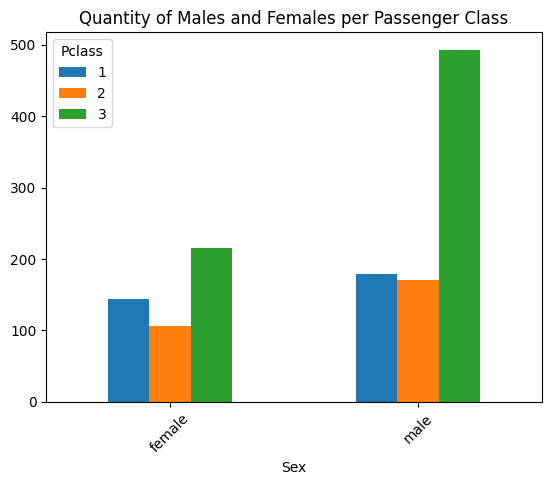

In [41]:
# Crosstab on Sex and Pclass plot
pd.crosstab(titanic_df['Sex'], titanic_df['Pclass']).plot(kind='bar', rot=45, title='Quantity of Males and Females per Passenger Class');

#### Pivot Table
function is used to create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects.

In [42]:
titanic_df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [43]:
# same as this groupby function
titanic_df.groupby(['Sex', 'Pclass'])[['Age']].mean()

Age
Sex    Pclass           
female 1       37.037594
       2       27.499223
       3       22.185329
male   1       41.029272
       2       30.815380
       3       25.962264

In [44]:
# Unstack will present in tabular form similar to pivot_table
titanic_df.groupby(['Sex', 'Pclass'])[['Age']].mean().unstack()

Age                      
Pclass          1          2          3
Sex                                    
female  37.037594  27.499223  22.185329
male    41.029272  30.815380  25.962264

#### Data Munging: Dealing with Missing Values

In [45]:
# Check Dataframe Structure
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 155.0+ KB


#### Feature: Embarked

In [46]:
# Extract rows with Embarked as Null
titanic_df[titanic_df['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [47]:
# How many embarked at different points
titanic_df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [48]:
pd.crosstab(titanic_df[~titanic_df['Survived'].isna()]['Survived'], titanic_df[~titanic_df['Survived'].isna()]['Embarked'])

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [49]:
# Pivot table equivalent --> 'Size' counts categorical occurences
titanic_df.pivot_table(index='Survived', columns='Embarked', aggfunc='size', dropna=True)

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [50]:
# Could impute the missing values with 'S'
# However check to see fare value mean compared to the Fare the 2 nulls in Embarked paid
# titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S', inplace=True)

In [51]:
titanic_df.groupby(['Pclass', 'Embarked'])[['Fare']].median()
# Embarked 'C' Fare mean value is closer to fare value (80) paid by to Null Embarked rows

Fare
Pclass Embarked         
1      C         76.7292
       Q         90.0000
       S         52.0000
2      C         15.3146
       Q         12.3500
       S         15.3750
3      C          7.8958
       Q          7.7500
       S          8.0500

In [52]:
# Impute the rows with 'C' not 'S'
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('C')

In [53]:
# Extract rows with Embarked as Null
titanic_df[titanic_df['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [54]:
# Check Dataframe Structure again
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 155.0+ KB


#### Feature: Fare

In [55]:
titanic_df[titanic_df['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [56]:
# fare values based on Class, Embarked and Sex
median_fare = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'S')]['Fare'].median()
male_median_fare = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'S') & (titanic_df['Sex'] == 'male')]['Fare'].median()
female_median_fare = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'S') & (titanic_df['Sex'] == 'female')]['Fare'].median()
print(f"Median Fare for Pclass '3' and Embarked 'S': ${median_fare:.2f}\nMale Median Fare for Pclass '3' and Embarked 'S': ${male_median_fare:.2f}\nFemale Median Fare for Pclass '3' and Embarked 'S': ${female_median_fare:.2f}")

Median Fare for Pclass '3' and Embarked 'S': $8.05
Male Median Fare for Pclass '3' and Embarked 'S': $8.05
Female Median Fare for Pclass '3' and Embarked 'S': $13.78


In [57]:
# Impute the row missing Fare with 8.05
titanic_df['Fare'] = titanic_df['Fare'].fillna(8.05)

In [58]:
# Check Dataframe Structure again
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 155.0+ KB


#### Feature: Age

In [59]:
titanic_df[titanic_df['Age'].isna()].head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


##### Research Mean Age Value

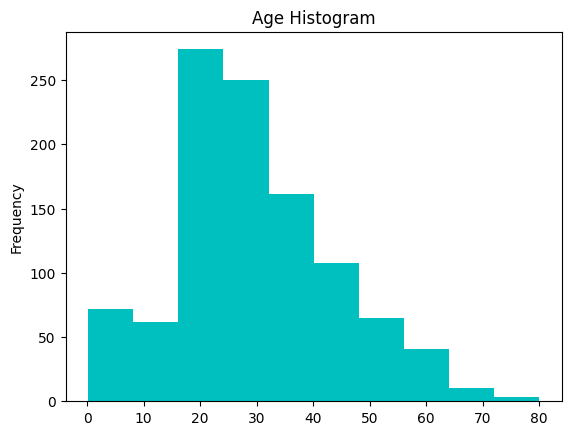

In [60]:
# visualize Age with a Histogram
titanic_df['Age'].plot(kind='hist', title='Age Histogram', color='c');

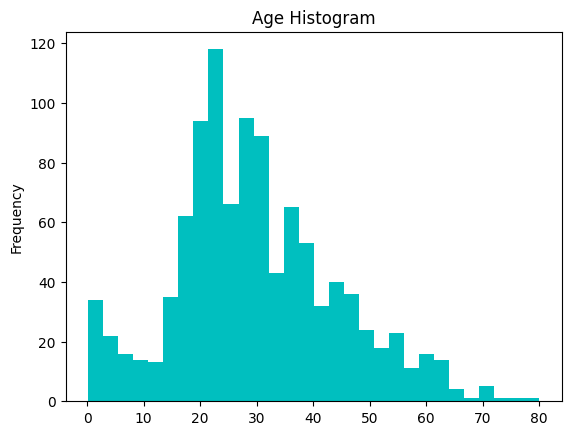

In [61]:
# visualize Age with a Histogram smaller bins
titanic_df['Age'].plot(kind='hist', title='Age Histogram', color='c', bins=30);

In [62]:
# get mean Age
titanic_df['Age'].mean()

29.881137667304014

##### Research Median Age Value

In [63]:
# get median Age
titanic_df['Age'].median()

28.0

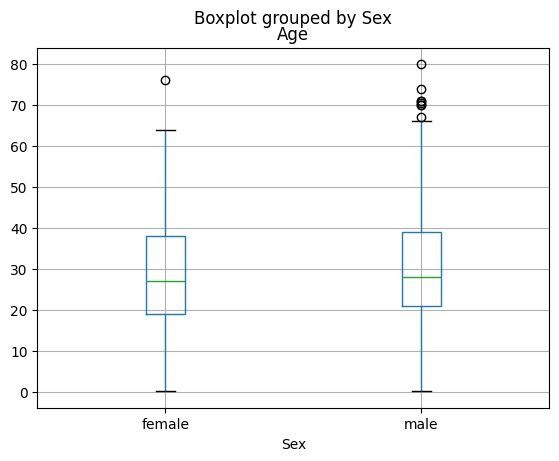

In [64]:
# boxplot age and sex
titanic_df[titanic_df.notna()].boxplot('Age', 'Sex');

In [65]:
# get median Age per sex
titanic_df.groupby('Sex')[['Age']].median()

,Age
Sex,
female,27.0
male,28.0


##### Research Median Age by Passenger Class

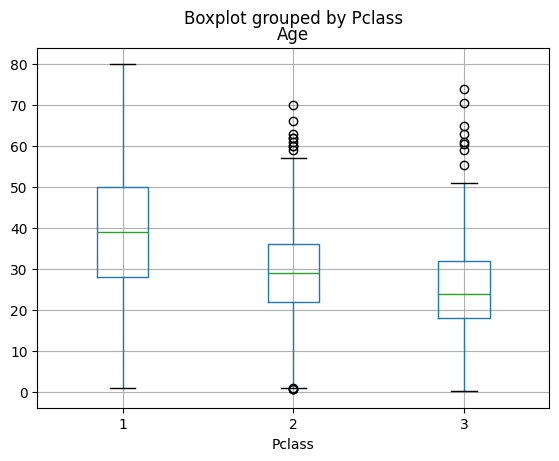

In [66]:
# boxplot age and sex
titanic_df[titanic_df.notna()].boxplot('Age', 'Pclass');

In [67]:
titanic_df.groupby('Pclass')[['Age']].median()

,Age
Pclass,
1,39.0
2,29.0
3,24.0


##### Research Median Age by Title in Name

In [68]:
titanic_df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [69]:
# function to extract title from name
def get_title(name):
    # add title_group to bin titles for age median
    title_group = {
        'mr': 'Mr',
        'miss': 'Miss',
        'mrs': 'Mrs',
        'master': 'Master',
        'rev': 'Sir',
        'dr': 'Officer',
        'col': 'Officer',
        'mlle': 'Miss',
        'major': 'Officer',
        'ms': 'Mrs',
        'lady': 'Lady',
        'sir': 'Sir',
        'mme': 'Mrs',
        'don': 'Sir',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    first_name_with_title = name.split(',')[1]  # extract text after commma
    title = first_name_with_title.split('.')[0]  # extract text before period
    title = title.strip().lower()  # strip whitespace and change to lower case
    return title_group[title]

In [70]:
# use lambda to get title
titanic_df['Name'].apply(lambda row: get_title(row)).value_counts()

Name
Mr         757
Miss       262
Mrs        200
Master      61
Officer     15
Sir         11
Lady         3
Name: count, dtype: int64

In [71]:
# use lambda to get title
titanic_df['Name'].apply(lambda row: get_title(row)).value_counts()

Name
Mr         757
Miss       262
Mrs        200
Master      61
Officer     15
Sir         11
Lady         3
Name: count, dtype: int64

In [72]:
titanic_df['Titles'] = titanic_df['Name'].apply(lambda row: get_title(row))  # assign values to new column

In [73]:
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs


In [74]:
titanic_df.groupby('Titles')[['Age']].median()

,Age
Titles,
Lady,39.0
Master,4.0
Miss,22.0
Mr,29.0
Mrs,35.0
Officer,51.0
Sir,41.0


In [75]:
# Group the DataFrame by 'Titles' and calculate the median 'Age' for each group,
# then broadcast (transform) this median value back to all rows within each group.
title_age_median = titanic_df.groupby('Titles')['Age'].transform('median')

# Replace missing values in the 'Age' column with the corresponding median age from 'title_age_median'.
titanic_df['Age'] = titanic_df['Age'].fillna(title_age_median)

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Titles    1309 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 165.2+ KB


#### Dealing with outliers

##### Age

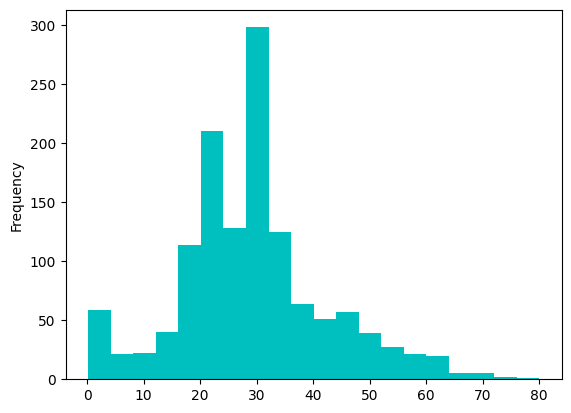

In [77]:
titanic_df['Age'].plot(kind='hist', bins=20, color='c');

In [78]:
titanic_df[titanic_df['Age'] > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
PassengerId,,,,,,,,,,,,
97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0.0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr
988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,Mrs


##### Fare

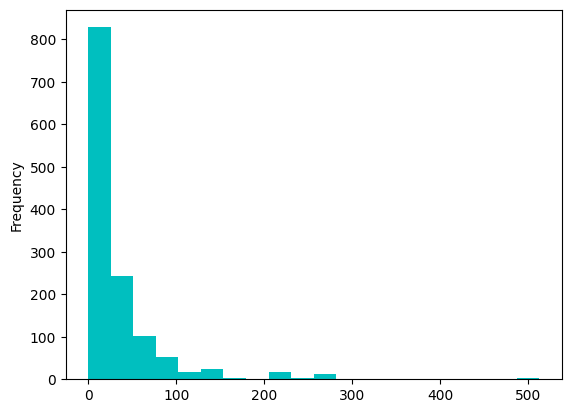

In [79]:
titanic_df['Fare'].plot(kind='hist', bins=20, color='c');

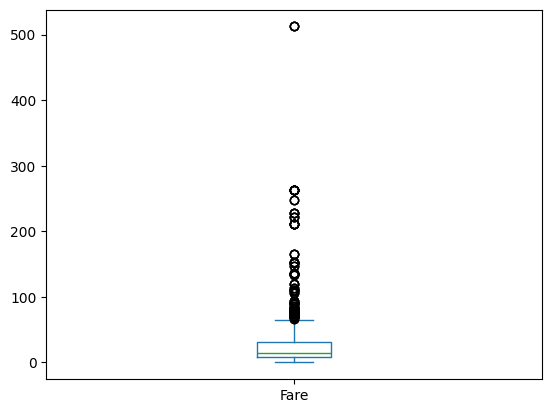

In [80]:
titanic_df['Fare'].plot(kind='box');

In [81]:
titanic_df[titanic_df['Fare'] == titanic_df['Fare'].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
PassengerId,,,,,,,,,,,,
259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [82]:
# apply numpy log function (since fare is always positive) to see if skewedness can be reduced
log_fare = np.log(titanic_df['Fare'] + 1.0)  # addition of 1 to accomodate zero value fares (ship crew)

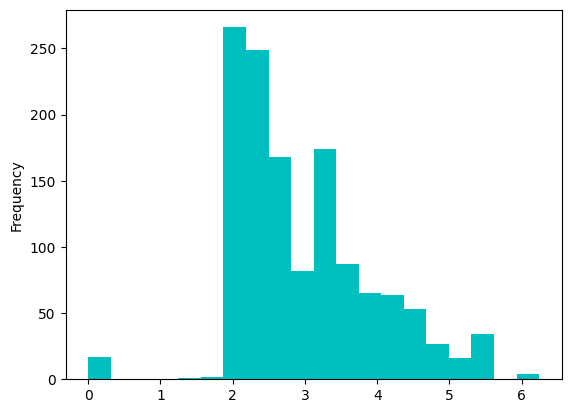

In [83]:
log_fare.plot(kind='hist', color='c', bins=20);

In [84]:
# divides the Fare data into 4 equal-sized bins (quartiles) based on the distribution of the data.
pd.qcut(titanic_df['Fare'], 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [85]:
# creates a new column Fare_Bin in the DataFrame df where each fare is categorized into one of the four labeled bins
titanic_df['Fare_Bin'] = pd.qcut(titanic_df['Fare'], 4, labels=['very_low','low','high','very_high'])
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low
6,0.0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q,Mr,low
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,very_high
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,high
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,low


#### Additional Feature Engineering

##### Create Age State (Child, Teenager, Adult, Senior)

In [86]:
titanic_df['Age_State'] = np.where(titanic_df['Age'] <= 12, 'Child',  # If Age <= 12, classify as 'Child'
    np.where(titanic_df['Age'] < 20, 'Teenager',  # Else if Age < 20, classify as 'Teenager'
        np.where(titanic_df['Age'] < 60, 'Adult',  # Else if Age < 60, classify as 'Adult'
            'Senior'  # Else, classify as 'Senior'
        )
    )
)

In [87]:
# pivot table for Age State --> 'Size' counts categorical occurences
titanic_df.pivot_table(index='Survived', columns='Age_State', aggfunc='size', dropna=True)

Age_State,Adult,Child,Senior,Teenager
Survived,,,,
0.0,443,31,19,56
1.0,254,42,7,39


##### Family Size

In [88]:
titanic_df['Family_Size'] = (titanic_df['Parch'] + titanic_df['SibSp'] + 1)  # plus 1 for self

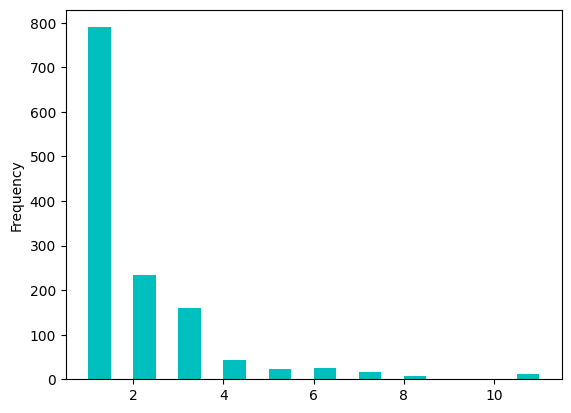

In [89]:
titanic_df['Family_Size'].plot(kind='hist', color='c', bins=20);

In [90]:
titanic_df.loc[titanic_df['Family_Size'] == titanic_df['Family_Size'].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Fare_Bin,Age_State,Family_Size
PassengerId,,,,,,,,,,,,,,,
160,0.0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,NaN,S,Master,very_high,Child,11
181,0.0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
202,0.0,3,"Sage, Mr. Frederick",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
325,0.0,3,"Sage, Mr. George John Jr",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
793,0.0,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
847,0.0,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
1080,NaN,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
1234,NaN,3,"Sage, Mr. John George",male,29.0,1,9,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11


In [91]:
# pivot table for Age State --> 'Size' counts categorical occurences
titanic_df.pivot_table(index='Survived', columns='Family_Size', aggfunc='size', dropna=True)

Family_Size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
1.0,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


#### Feature: IsMother

In [92]:
titanic_df['Is_Mother'] = np.where((titanic_df['Sex'] == 'female') & (titanic_df['Parch'] > 0) & (titanic_df['Age'] > 20) & (titanic_df['Titles'] != 'Miss'), 1, 0)

In [93]:
# pivot table for Age State --> 'Size' counts categorical occurences
titanic_df.pivot_table(index='Survived', columns='Is_Mother', aggfunc='size', dropna=True)

Is_Mother,0,1
Survived,,
0.0,533,16
1.0,303,39


#### Feature: Deck Location of Passenger

In [94]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [95]:
# Investigate Cabin 'T'
titanic_df[titanic_df['Cabin'] == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Fare_Bin,Age_State,Family_Size,Is_Mother
PassengerId,,,,,,,,,,,,,,,,
340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,very_high,Adult,1,0


In [96]:
# set 'T' value to nan as there is only one and it doesn't fit the rest of the naming conventions
titanic_df.loc[titanic_df['Cabin'] == 'T', 'Cabin'] = np.nan

In [97]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [98]:
# function to assign nan Cabin Values to Deck placeholder 'Z'
def get_Deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

In [99]:
# call deck function
titanic_df['Deck'] = titanic_df['Cabin'].apply(lambda row: get_Deck(row))

In [100]:
titanic_df['Deck'].value_counts()

Deck
Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: count, dtype: int64

In [101]:
# pivot table for Age State --> 'Size' counts categorical occurences
titanic_df.pivot_table(index='Survived', columns='Deck', aggfunc='size', dropna=True)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0.0,8,12,24,8,8,5,2,482
1.0,7,35,35,25,24,8,2,206


In [102]:
# get Data Structure
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    float64 
 1   Pclass       1309 non-null   int64   
 2   Name         1309 non-null   object  
 3   Sex          1309 non-null   object  
 4   Age          1309 non-null   float64 
 5   SibSp        1309 non-null   int64   
 6   Parch        1309 non-null   int64   
 7   Ticket       1309 non-null   object  
 8   Fare         1309 non-null   float64 
 9   Cabin        294 non-null    object  
 10  Embarked     1309 non-null   object  
 11  Titles       1309 non-null   object  
 12  Fare_Bin     1309 non-null   category
 13  Age_State    1309 non-null   object  
 14  Family_Size  1309 non-null   int64   
 15  Is_Mother    1309 non-null   int32   
 16  Deck         1309 non-null   object  
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 202.

#### Categorical Feature Encoding

In [103]:
# sex
titanic_df['Is_Male'] = np.where(titanic_df['Sex'] == 'male', 1, 0)
titanic_df['Is_Female'] = np.where(titanic_df['Sex'] == 'female', 1, 0)

In [104]:
titanic_df = pd.get_dummies(titanic_df, columns=['Deck', 'Pclass', 'Titles', 'Fare_Bin', 'Embarked', 'Age_State'], dtype=int)

In [105]:
# get Data Structure
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   Family_Size         1309 non-null   int64  
 10  Is_Mother           1309 non-null   int32  
 11  Is_Male             1309 non-null   int32  
 12  Is_Female           1309 non-null   int32  
 13  Deck_A              1309 non-null   int32  
 14  Deck_B              1309 non-null   int32  
 15  Deck_C              1309 non-null   int32  
 16  Deck_D     

In [107]:
# drop categorical columns
titanic_df.drop(columns=['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], inplace=True)

In [109]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   Family_Size         1309 non-null   int64  
 4   Is_Mother           1309 non-null   int32  
 5   Is_Male             1309 non-null   int32  
 6   Is_Female           1309 non-null   int32  
 7   Deck_A              1309 non-null   int32  
 8   Deck_B              1309 non-null   int32  
 9   Deck_C              1309 non-null   int32  
 10  Deck_D              1309 non-null   int32  
 11  Deck_E              1309 non-null   int32  
 12  Deck_F              1309 non-null   int32  
 13  Deck_G              1309 non-null   int32  
 14  Deck_Z              1309 non-null   int32  
 15  Pclass_1            1309 non-null   int32  
 16  Pclass_2   

In [117]:
# save dataframe
PROCESSED_DATA_FP = os.path.join(os.path.pardir, 'data', 'processed')
TRAIN_FN = os.path.join(PROCESSED_DATA_FP, 'train.csv')
TEST_FN = os.path.join(PROCESSED_DATA_FP, 'test.csv')

In [118]:
# filter train data
proc_train = titanic_df.loc[~titanic_df['Survived'].isna()]
proc_train

,Survived,Age,Fare,Family_Size,Is_Mother,Is_Male,Is_Female,Deck_A,Deck_B,Deck_C,...,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,Age_State_Adult,Age_State_Child,Age_State_Senior,Age_State_Teenager
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,7.2500,2,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1.0,38.0,71.2833,2,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
3,1.0,26.0,7.9250,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,1.0,35.0,53.1000,2,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
5,0.0,35.0,8.0500,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,27.0,13.0000,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
888,1.0,19.0,30.0000,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
889,0.0,22.0,23.4500,4,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [126]:
# filter test data
proc_test = titanic_df.loc[titanic_df['Survived'].isna()]
proc_test = proc_test.drop(columns='Survived')
proc_test

,Age,Fare,Family_Size,Is_Mother,Is_Male,Is_Female,Deck_A,Deck_B,Deck_C,Deck_D,...,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,Age_State_Adult,Age_State_Child,Age_State_Senior,Age_State_Teenager
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,7.8292,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
893,47.0,7.0000,2,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
894,62.0,9.6875,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
895,27.0,8.6625,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
896,22.0,12.2875,3,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,29.0,8.0500,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1306,39.0,108.9000,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
1307,38.5,7.2500,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [127]:
# output data to processed folder
proc_train.to_csv(TRAIN_FN)
proc_test.to_csv(TEST_FN)

In [128]:
get_processed_data_script_fp = os.path.join(os.path.pardir, 'src', 'get_processed_data.py')

In [135]:
%%writefile $get_processed_data_script_fp
import numpy as np
import pandas as pd
import os

def read_data():
    # Set data paths for raw_data
    RAW_DATA_FP = os.path.join(os.path.pardir, 'data', 'raw')
    TRAIN_FP = os.path.join(RAW_DATA_FP, 'train.csv')
    TEST_FP = os.path.join(RAW_DATA_FP, 'test.csv')
    # read data into dataframes
    train_df = pd.read_csv(TRAIN_FP, index_col='PassengerId')
    test_df = pd.read_csv(TEST_FP, index_col='PassengerId')
    # concatenate datasets into one
    df = pd.concat([train_df, test_df])
    return df

def process_data(df):
    # using method chaining concept
    return (df
            # Create title feature
            .assign(Title = lambda row: row['Name'].apply(get_title))
            # work with missing values
            .pipe(fill_missing_values)
            # create fare bin feature
            .assign(Fare_Bin = lambda x: pd.qcut(x['Fare'], 4, labels=['very_low','low','high','very_high']))
            .assign(Age_State = lambda x: np.where(
                x['Age'] <= 12, 'Child', 
                np.where(x['Age'] < 20, 'Teenager', 
                    np.where(x['Age'] < 60, 'Adult', 
                        'Senior')
                )
            ))
            .assign(Family_Size = lambda x: x['Parch'] + x['SibSp'] + 1)
            .assign(Is_Mother = lambda x: np.where(
                (x['Sex'] == 'female') & 
                (x['Parch'] > 0) & 
                (x['Age'] > 20) & 
                (x['Title'] != 'Miss'), 1, 0))
            .assign(Cabin = lambda x: np.where(x['Cabin'] == 'T', np.nan, x['Cabin']))
            .assign(Deck = lambda x: x['Cabin'].apply(lambda row: get_Deck(row)))
            .assign(Is_Male = lambda row: np.where(row['Sex'] == 'male', 1, 0))
            .assign(Is_Female = lambda row: np.where(row['Sex'] == 'female', 1, 0))
            .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'Age_State'], dtype=int)
            .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1)
            .pipe(reorder_columns)
        )

# function to extract title from name
def get_title(name):
    # add title_group to bin titles for age median
    title_group = {
        'mr': 'Mr',
        'miss': 'Miss',
        'mrs': 'Mrs',
        'master': 'Master',
        'rev': 'Sir',
        'dr': 'Officer',
        'col': 'Officer',
        'mlle': 'Miss',
        'major': 'Officer',
        'ms': 'Mrs',
        'lady': 'Lady',
        'sir': 'Sir',
        'mme': 'Mrs',
        'don': 'Sir',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    first_name_with_title = name.split(',')[1]  # extract text after comma
    title = first_name_with_title.split('.')[0]  # extract text before period
    title = title.strip().lower()  # strip whitespace and change to lower case
    return title_group[title]

def get_Deck(cabin):
    # assign NaN Cabin Values to Deck placeholder 'Z'
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

def fill_missing_values(df):
    # Embarked
    df['Embarked'] = df['Embarked'].fillna('C')
    # Fare
    median_fare = df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
    df['Fare'] = df['Fare'].fillna(median_fare)
    # Age
    title_age_median = df.groupby('Title')['Age'].transform('median')
    df['Age'] = df['Age'].fillna(title_age_median)
    return df

def reorder_columns(df):
    # ensure Survived column is in Col_Index 0
    df.insert(0, 'Survived', df.pop('Survived'))
    return df

def write_data(df):
    # save dataframe
    PROCESSED_DATA_FP = os.path.join(os.path.pardir, 'data', 'processed')
    TRAIN_FN = os.path.join(PROCESSED_DATA_FP, 'train.csv')
    TEST_FN = os.path.join(PROCESSED_DATA_FP, 'test.csv')
    proc_train = df.loc[~df['Survived'].isna()]
    proc_test = df.loc[df['Survived'].isna()]
    # drop 'Survived' column
    proc_test = proc_test.drop(columns='Survived')
    # output data to processed folder
    proc_train.to_csv(TRAIN_FN)
    proc_test.to_csv(TEST_FN)

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ..\src\get_processed_data.py


In [136]:
!python $get_processed_data_script_fp

In [137]:
train = pd.read_csv(TRAIN_FN)
test = pd.read_csv(TEST_FN)

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    float64
 2   Age                 891 non-null    float64
 3   Fare                891 non-null    float64
 4   Family_Size         891 non-null    int64  
 5   Is_Mother           891 non-null    int64  
 6   Is_Male             891 non-null    int64  
 7   Is_Female           891 non-null    int64  
 8   Deck_A              891 non-null    int64  
 9   Deck_B              891 non-null    int64  
 10  Deck_C              891 non-null    int64  
 11  Deck_D              891 non-null    int64  
 12  Deck_E              891 non-null    int64  
 13  Deck_F              891 non-null    int64  
 14  Deck_G              891 non-null    int64  
 15  Deck_Z              891 non-null    int64  
 16  Pclass_1

In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Age                 418 non-null    float64
 2   Fare                418 non-null    float64
 3   Family_Size         418 non-null    int64  
 4   Is_Mother           418 non-null    int64  
 5   Is_Male             418 non-null    int64  
 6   Is_Female           418 non-null    int64  
 7   Deck_A              418 non-null    int64  
 8   Deck_B              418 non-null    int64  
 9   Deck_C              418 non-null    int64  
 10  Deck_D              418 non-null    int64  
 11  Deck_E              418 non-null    int64  
 12  Deck_F              418 non-null    int64  
 13  Deck_G              418 non-null    int64  
 14  Deck_Z              418 non-null    int64  
 15  Pclass_1            418 non-null    int64  
 16  Pclass_2